# RAIN DATA PREDICTION

## ROGER BAIGES & LLUC FURRIOLS

##### IMPORT NECESSARY LIBRARIES

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [99]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')

In [100]:
print(f'Shape of the data: {rain_data.shape}')
rain_data.head()

Shape of the data: (67021, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


# Preprocessing

In [101]:
rain_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [102]:
print(rain_data.dtypes)
rain_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000,64271.000000,63754.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340,0.310218,0.500000
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696,0.462586,0.500004
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000,0.000000,0.000000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000,0.000000,0.500000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000,1.000000,1.000000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000,1.000000,1.000000


## CREATING NEW VARIABLES

In [103]:
# Create new variable from the date column

rain_data['Date'] = pd.to_datetime(rain_data['Date'])
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day
rain_data['Year'] = rain_data['Date'].dt.year
rain_data.drop('Date', axis=1, inplace=True)

In [104]:
# Create 'Temp_difference' - difference between the maximum and minimum temperature of the day
rain_data['Temp_difference'] = rain_data['MaxTemp'] - rain_data['MinTemp']

# Create 'Humidity_difference' - difference between morning and afternoon humidity
rain_data['Humidity_difference'] = rain_data['Humidity9am'] - rain_data['Humidity3pm']

# Create 'Pressure_difference' - difference between morning and afternoon pressure
rain_data['Pressure_difference'] = rain_data['Pressure9am'] - rain_data['Pressure3pm']

# Create 'WindSpeed_difference' - difference between morning and afternoon wind speed
rain_data['WindSpeed_difference'] = rain_data['WindSpeed9am'] - rain_data['WindSpeed3pm']

"""# Create 'TotalSunshine' - potential sunshine duration up to the observed moment
# Assuming that 'Sunshine' is the observed sunshine and we need to consider days without observation
rain_data['TotalSunshine'] = rain_data['Sunshine'].fillna(0) * (rain_data['DayOfYear'] / 365)

# Create 'DayOfYear' from 'Month', 'Day', 'Year' to calculate 'TotalSunshine'
rain_data['DayOfYear'] = pd.to_datetime(rain_data[['Year', 'Month', 'Day']]).dt.dayofyear"""

"""# Create 'IsRainyDay' - binary variable if it rained today
rain_data['IsRainyDay'] = (rain_data['Rainfall'] > 0).astype(int)"""

# Add a print statement to show the shape of the DataFrame and the newly added columns
print("Shape of the data:", rain_data.shape)
print("Newly added columns:", [col for col in rain_data.columns if 'difference' in col or 'TotalSunshine' in col or 'IsRainyDay' in col])


Shape of the data: (67021, 29)
Newly added columns: ['Temp_difference', 'Humidity_difference', 'Pressure_difference', 'WindSpeed_difference']


# Data visualization


In [105]:
variable_stats = rain_data.describe().transpose()
variable_stats


,count,mean,std,min,25%,50%,75%,max
MinTemp,65864.0,12.552091,6.371143,-8.2,8.0,12.3,17.2,33.9
MaxTemp,65940.0,22.480866,7.108686,-4.8,17.2,21.8,27.4,47.3
Rainfall,64271.0,3.669512,10.981571,0.0,0.0,0.0,2.2,371.0
Evaporation,37591.0,5.122383,3.950017,0.0,2.4,4.4,7.0,77.3
Sunshine,34831.0,6.514499,3.932475,0.0,3.2,6.8,9.9,14.5
WindGustSpeed,61576.0,42.142150,14.638665,7.0,31.0,41.0,50.0,135.0
WindSpeed9am,65971.0,14.634764,9.227585,0.0,7.0,13.0,20.0,87.0
WindSpeed3pm,65328.0,19.187194,9.171806,0.0,13.0,19.0,24.0,87.0
Humidity9am,65257.0,72.074781,18.481003,0.0,61.0,74.0,87.0,100.0
Humidity3pm,64388.0,57.521433,21.741282,0.0,42.0,58.0,73.0,100.0


In [106]:
#information about categorical variables including RainToday and RainTomorrow
print("How many categories each categorical variable has:")
rain_data.select_dtypes(include='object').nunique()

How many categories each categorical variable has:


Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
dtype: int64

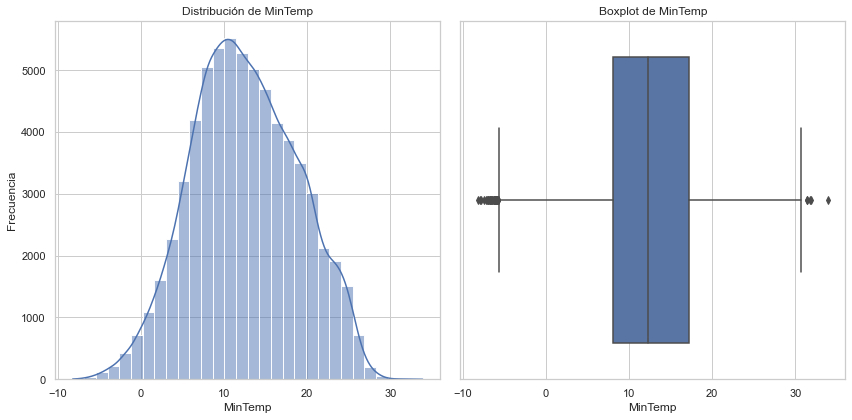

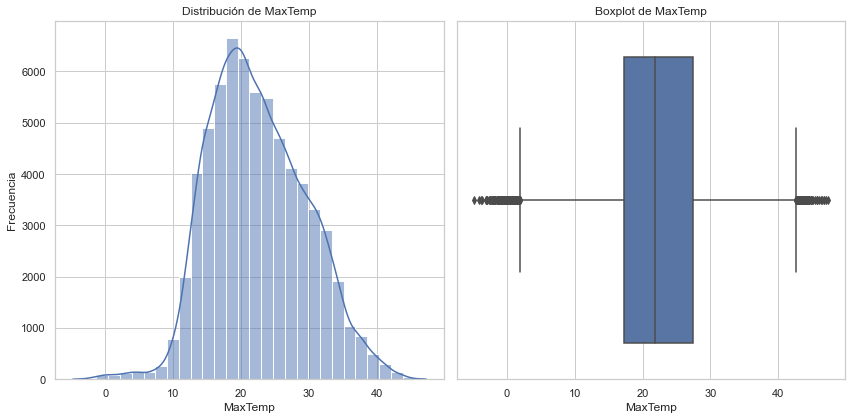

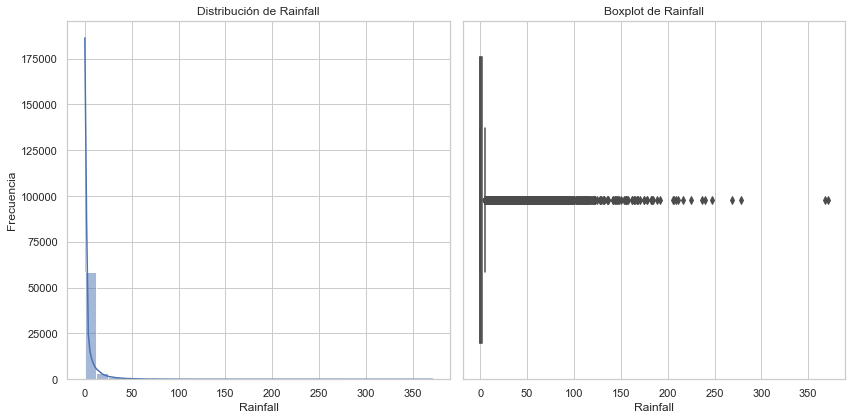

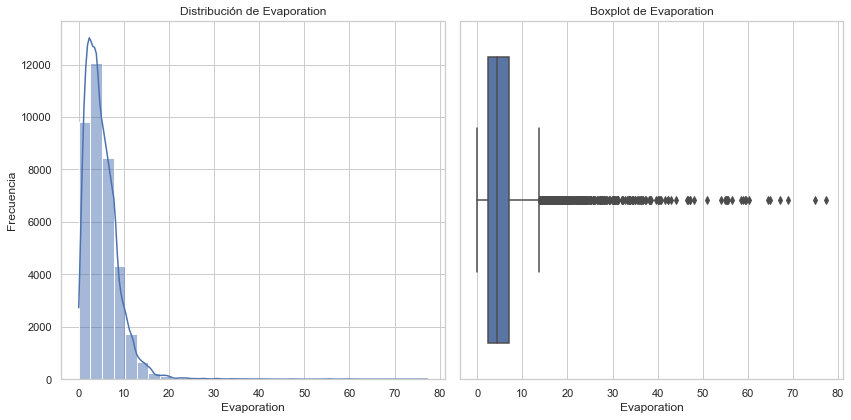

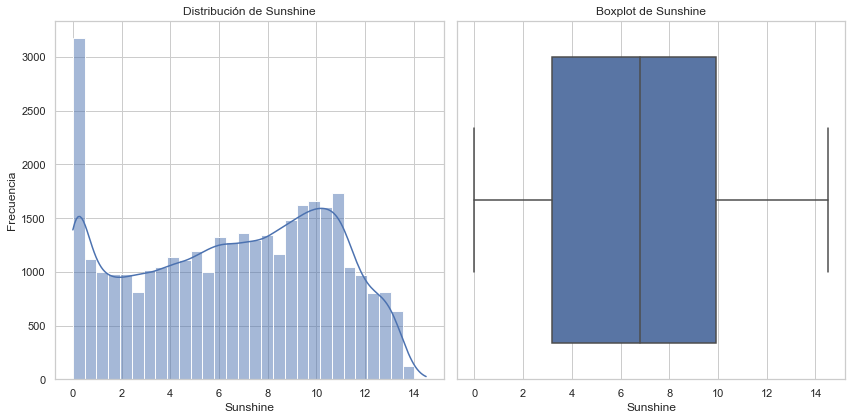

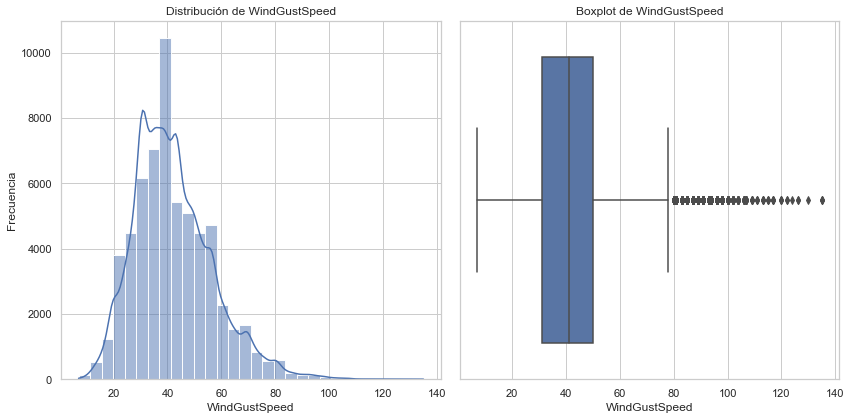

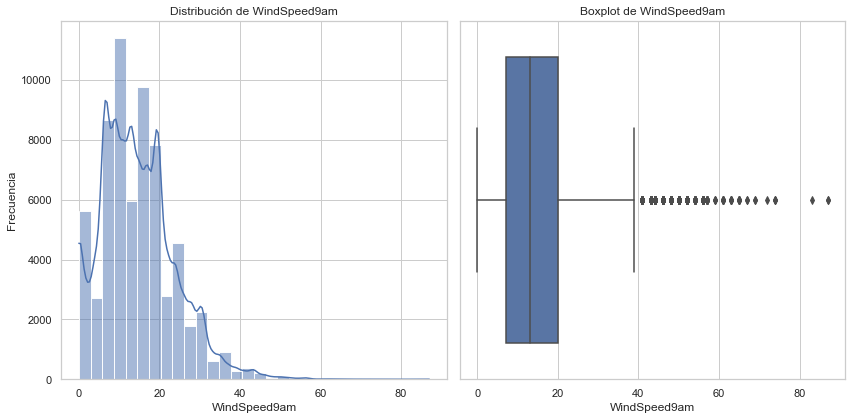

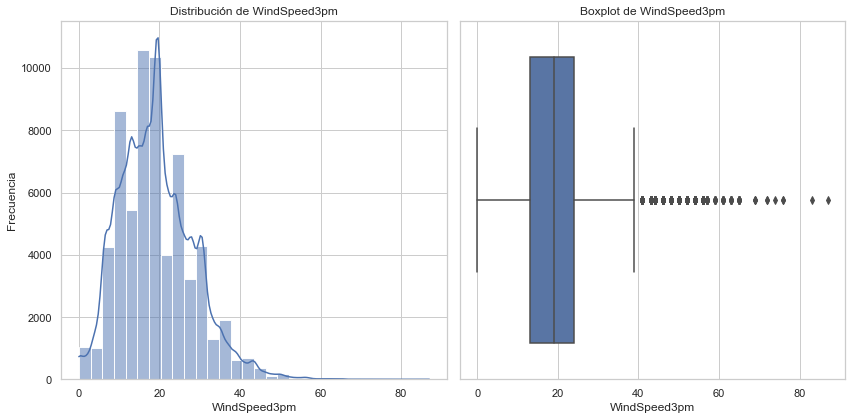

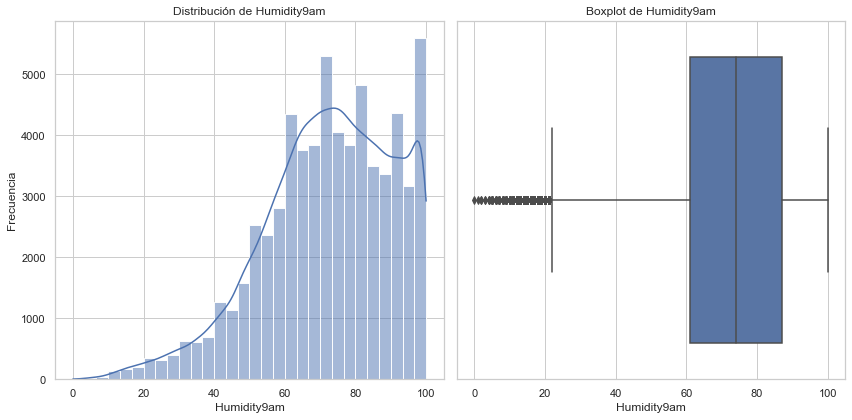

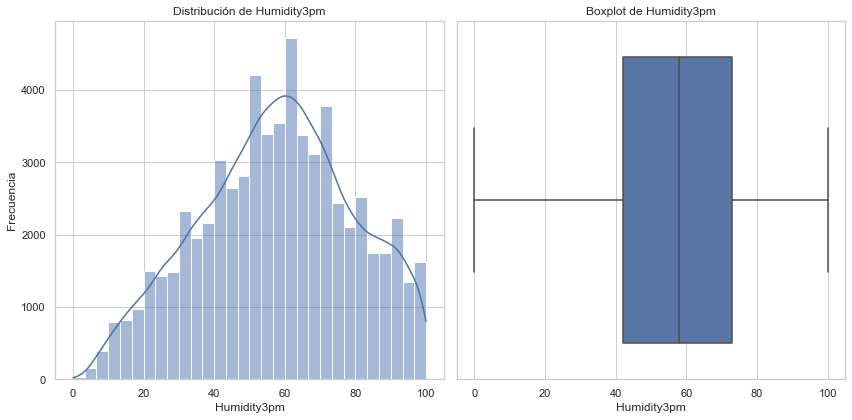

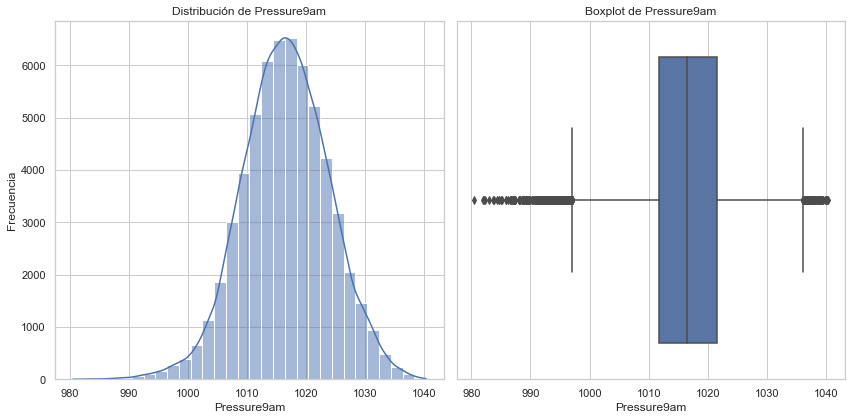

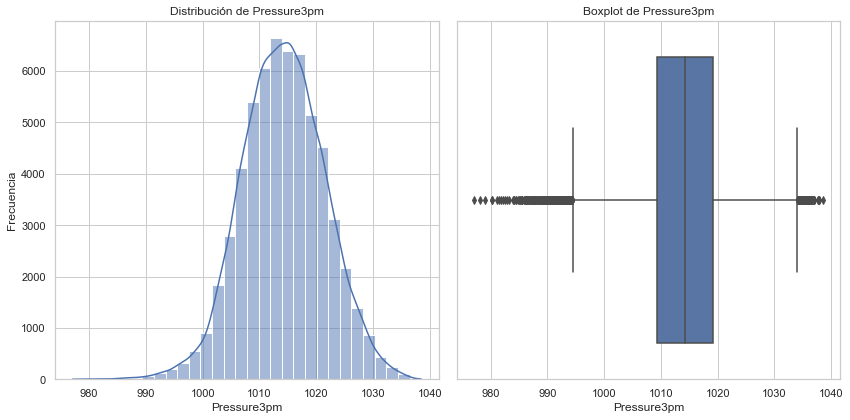

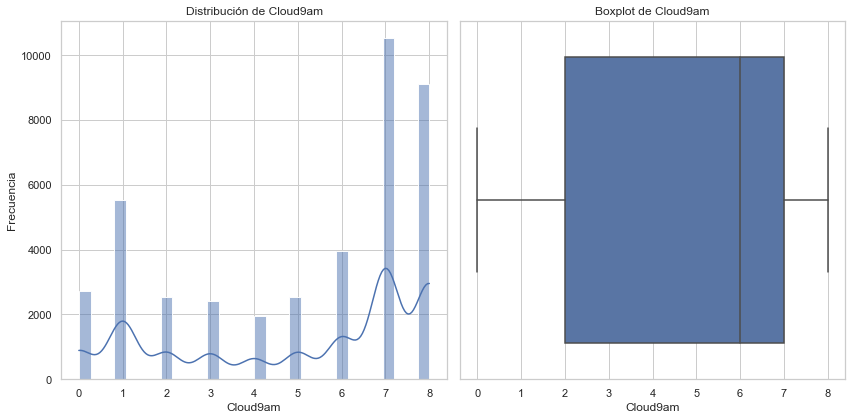

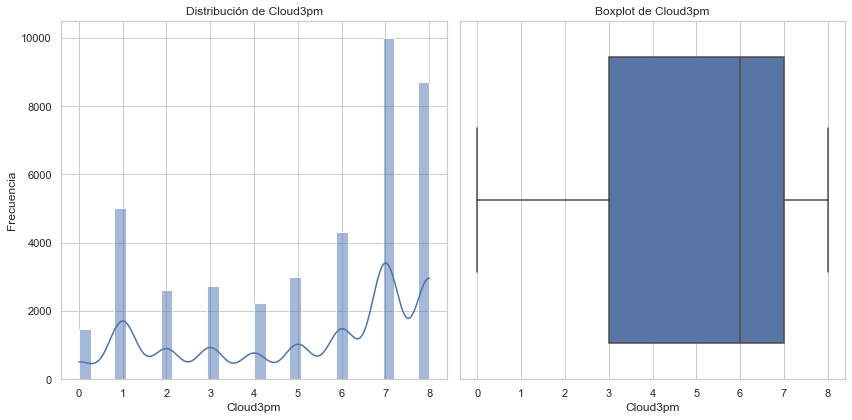

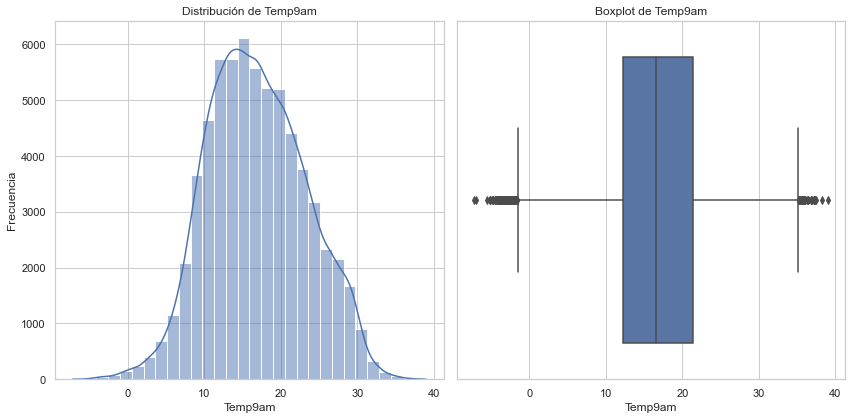

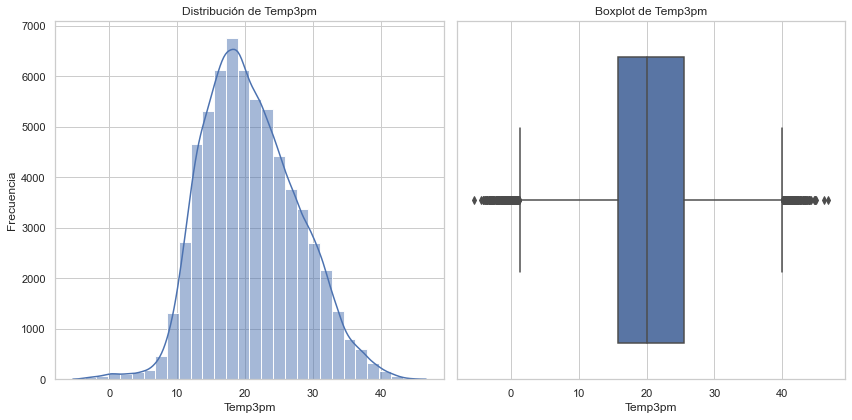

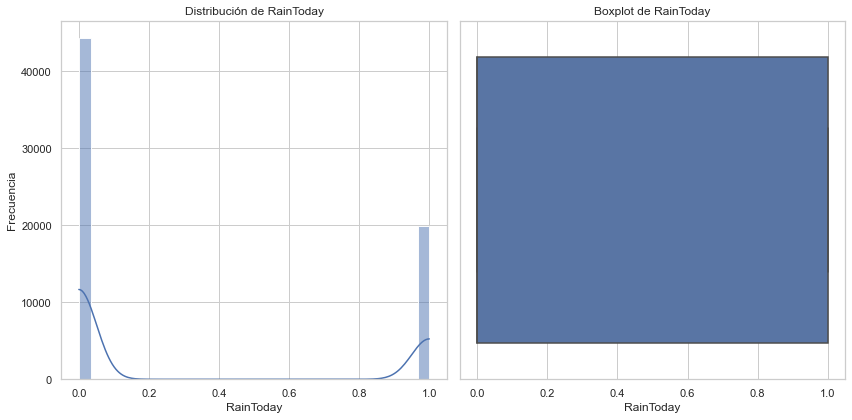

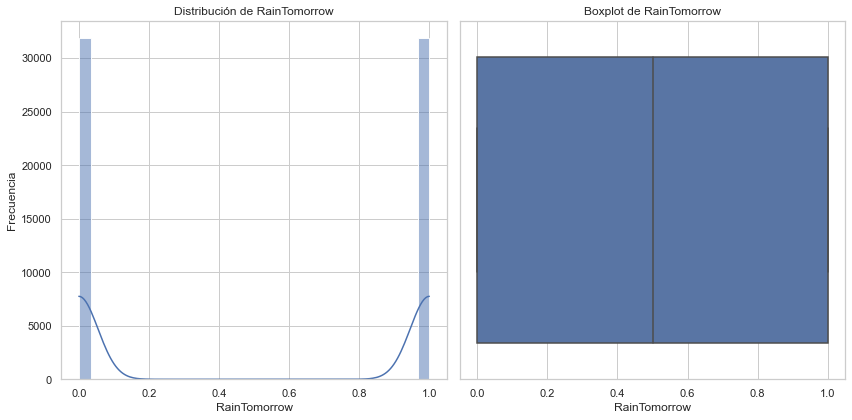

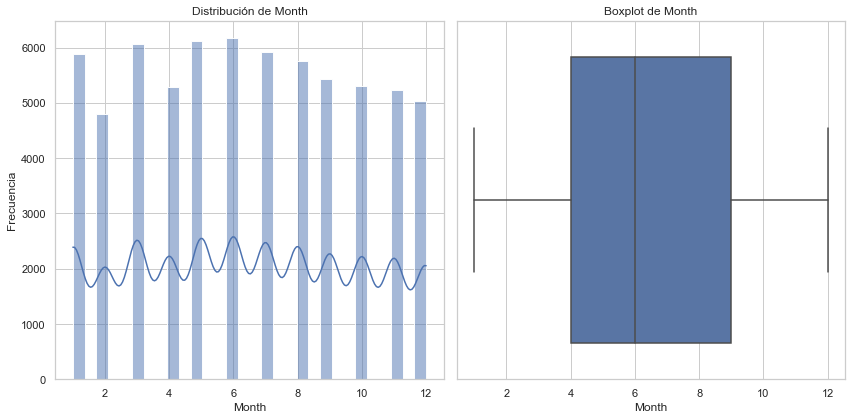

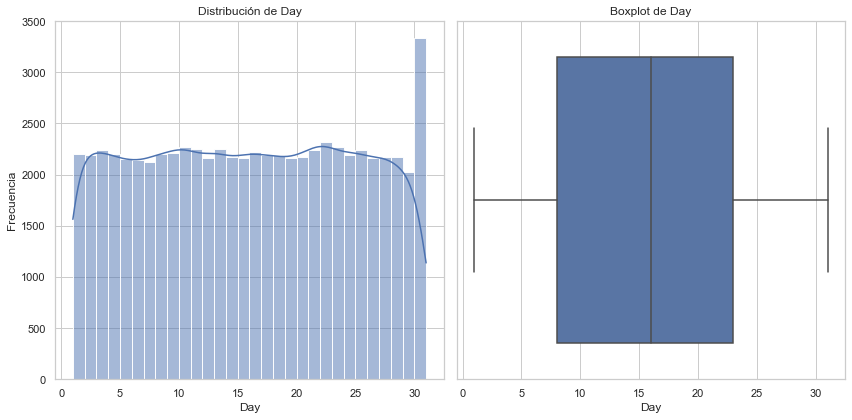

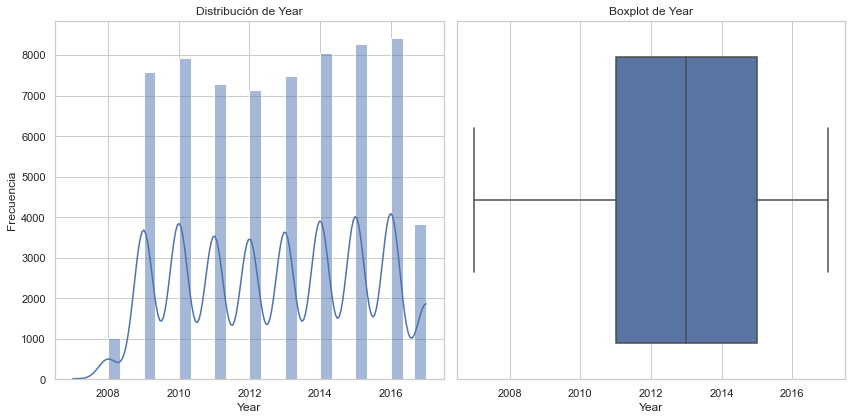

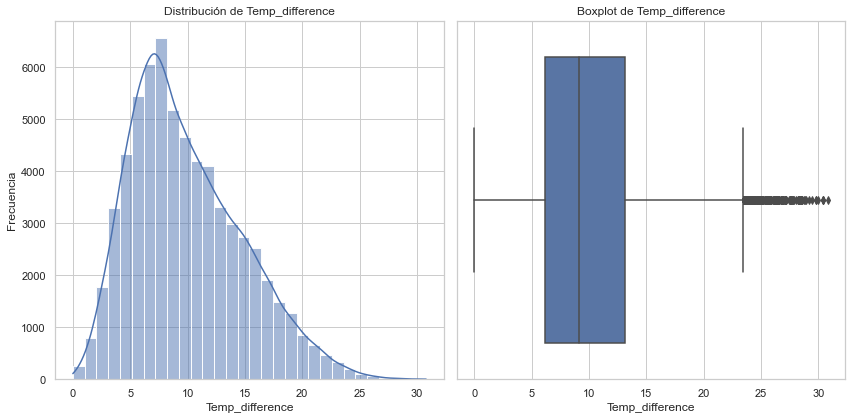

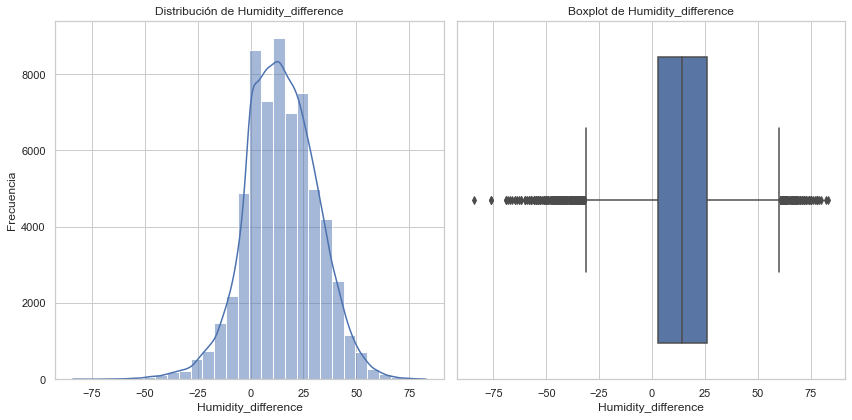

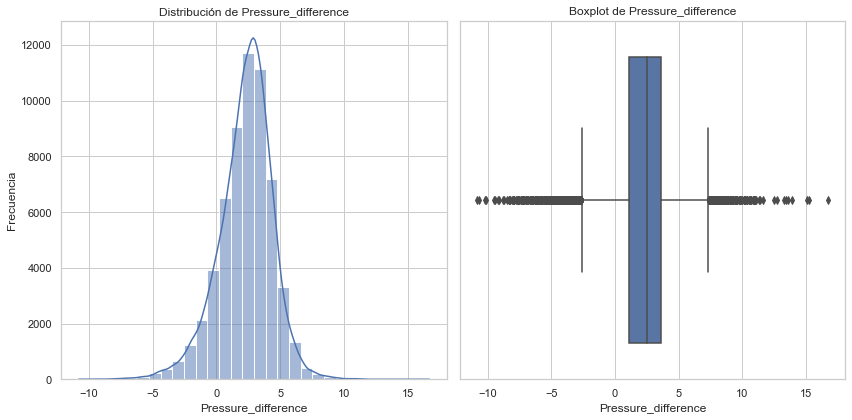

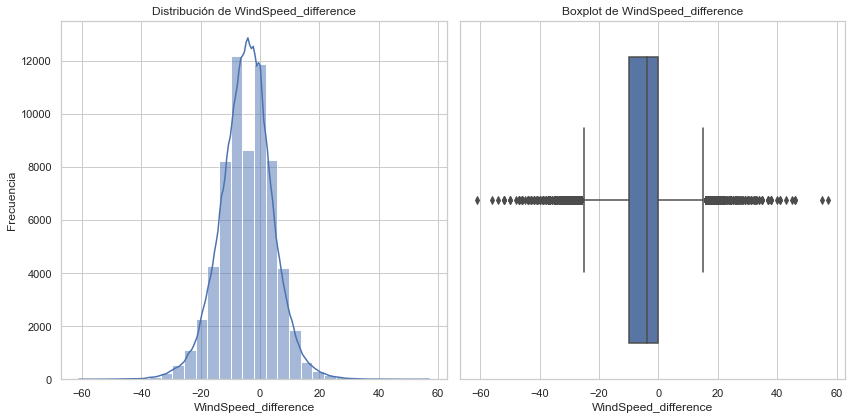

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos numéricos
numeric_columns = rain_data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(rain_data[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=rain_data[column])
    plt.title(f'Boxplot de {column}')

    plt.tight_layout()
    plt.show()


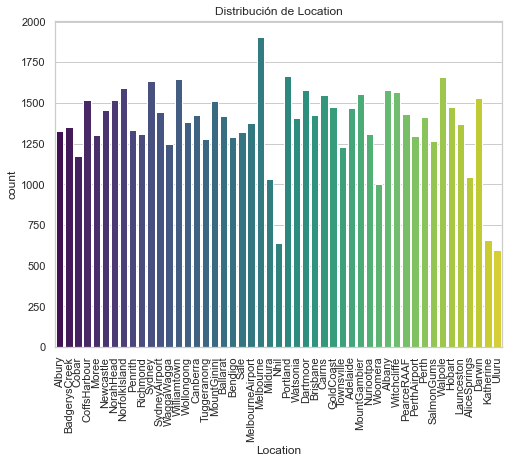

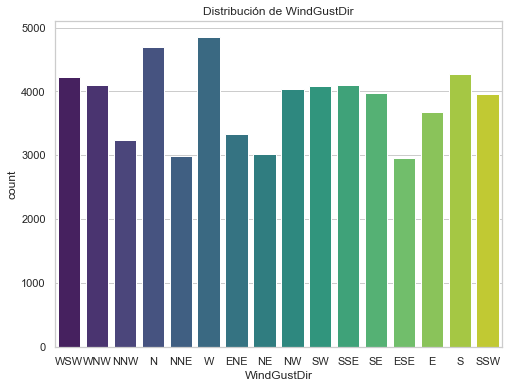

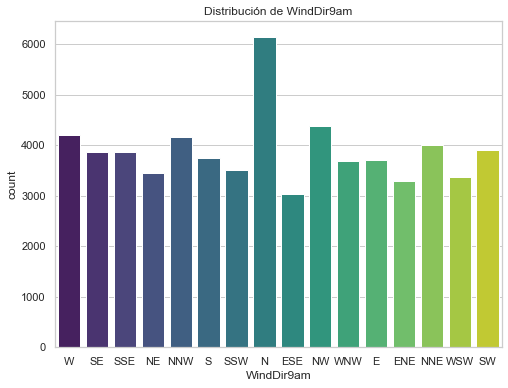

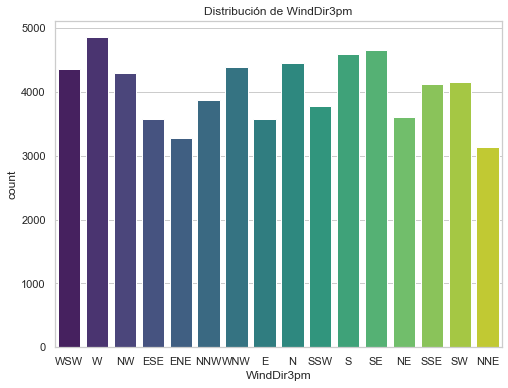

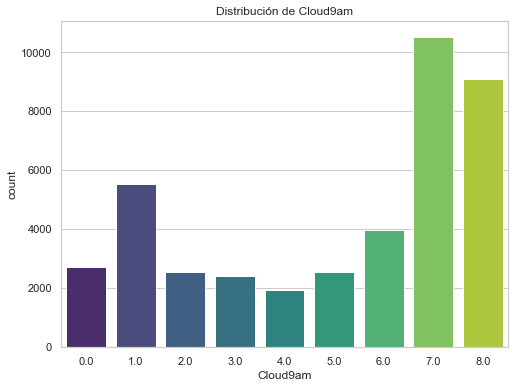

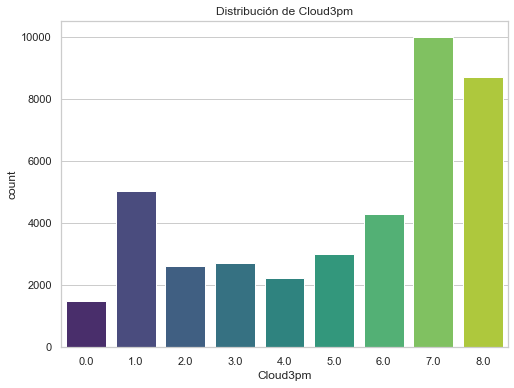

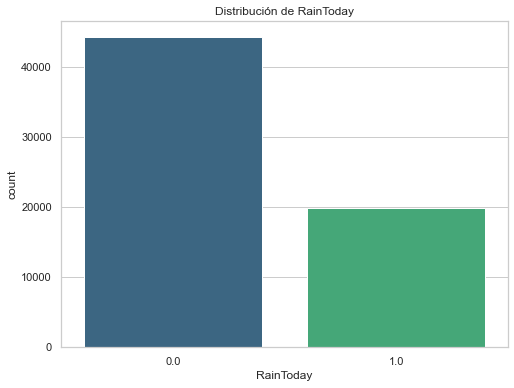

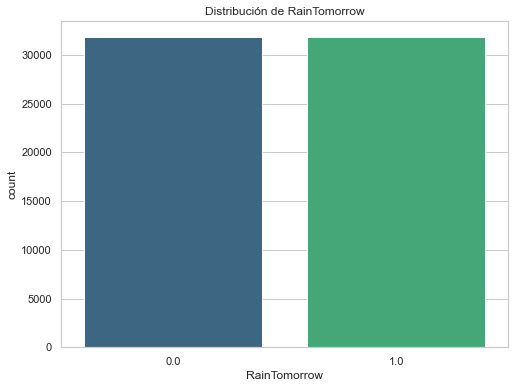

In [108]:
categorical_columns = rain_data.select_dtypes(include=['object']).columns
#also include 'Cloud9am' and 'Cloud3am' as categorical variable
categorical_columns = categorical_columns.append(pd.Index(['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']))

#Exclude the 'Date' column

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=rain_data[column], palette="viridis")
    plt.title(f'Distribución de {column}')
    if column == 'Location':
        plt.xticks(rotation=90)
    plt.show()


# Correlation between variables:

<AxesSubplot:>

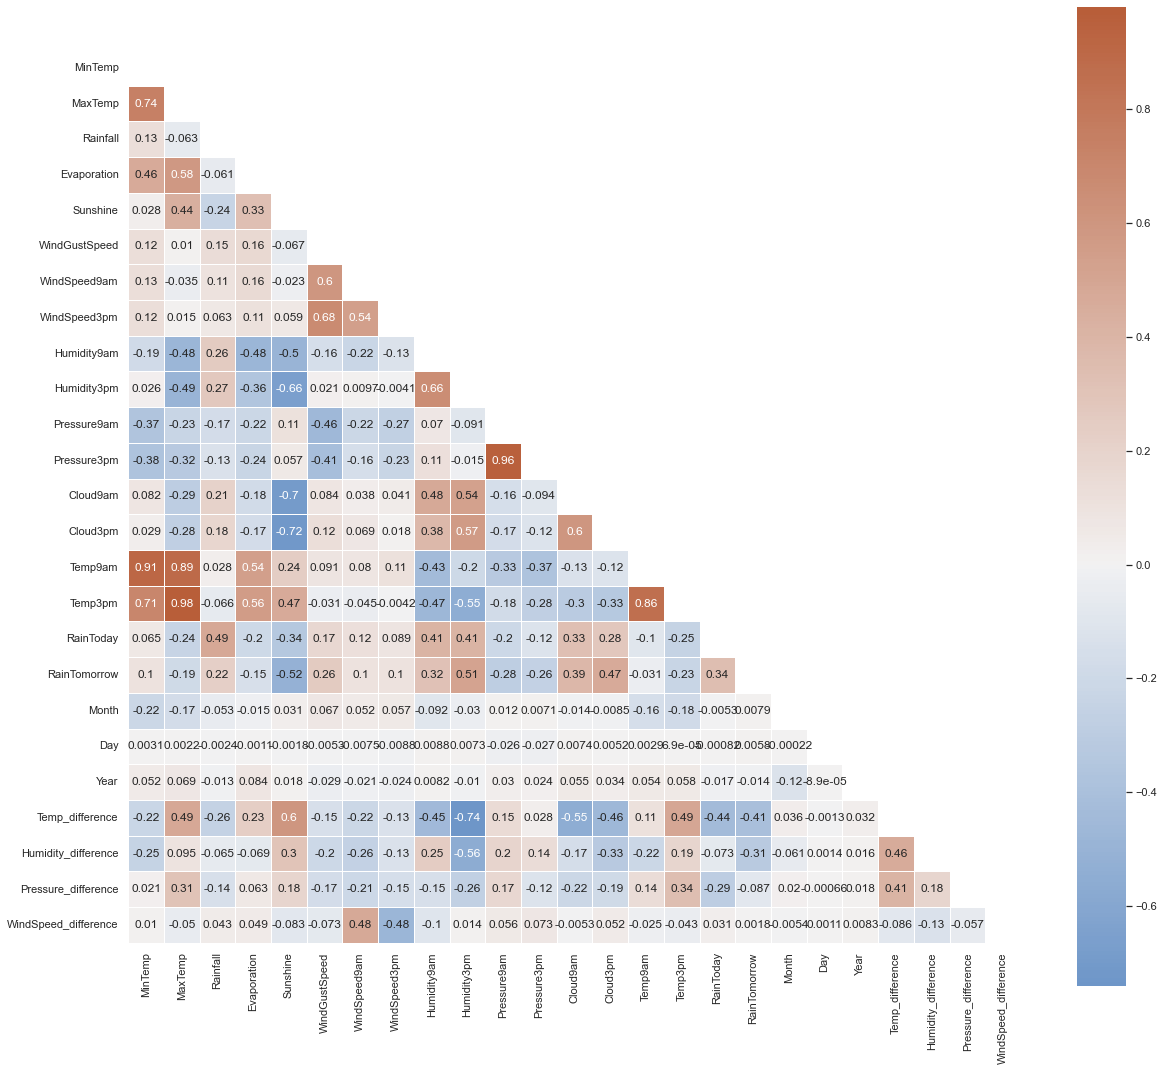

In [109]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = rain_data.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(correlation_matrix))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

### Strong correlation between:

Temp3pm and MaxTemp

Pressure3pm and Pressure9am

Temp9am and MinTemp

Temp9am and MaxTemp

Temp3pm and Temp9am

We will remove one of the features in each pair, to avoid multicollinearity

Also remove the date variables, as they don't 

In [110]:
rain_data.drop(['Temp3pm', 'Pressure3pm', 'Temp9am', 'Month', 'Date', 'Year'], axis = 1, inplace = True)

### Correlation between the target variable and the rest of variables:


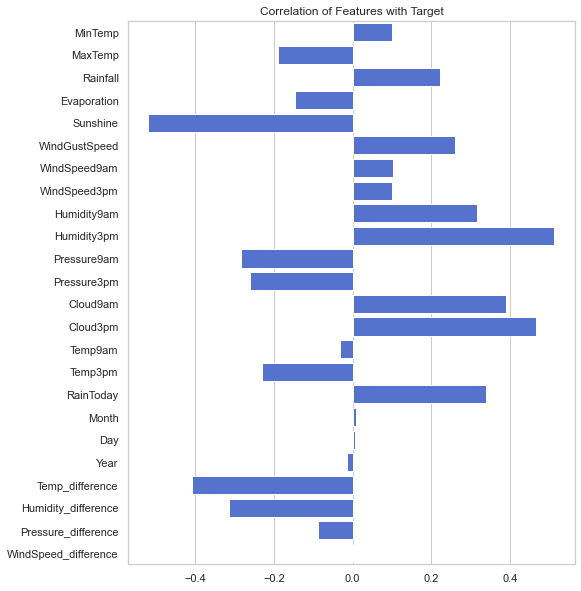

In [111]:
# Drop 'RainTomorrow' from the correlations
target_correlations = correlation_matrix['RainTomorrow']
target_correlations = target_correlations.drop('RainTomorrow')

# Create the vertical bar plot
plt.figure(figsize=(8, 10))
sns.barplot(y=target_correlations.index, x=target_correlations.values, color="royalblue", orient='h')
plt.title('Correlation of Features with Target')
plt.show()

# Missing values

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1157,1.726325,float64
MaxTemp,1081,1.612927,float64
Rainfall,2750,4.103192,float64
Evaporation,29430,43.911610,float64
Sunshine,32190,48.029722,float64
WindGustDir,5487,8.186986,object
WindGustSpeed,5445,8.124319,float64
WindDir9am,4751,7.088823,object
WindDir3pm,2288,3.413855,object


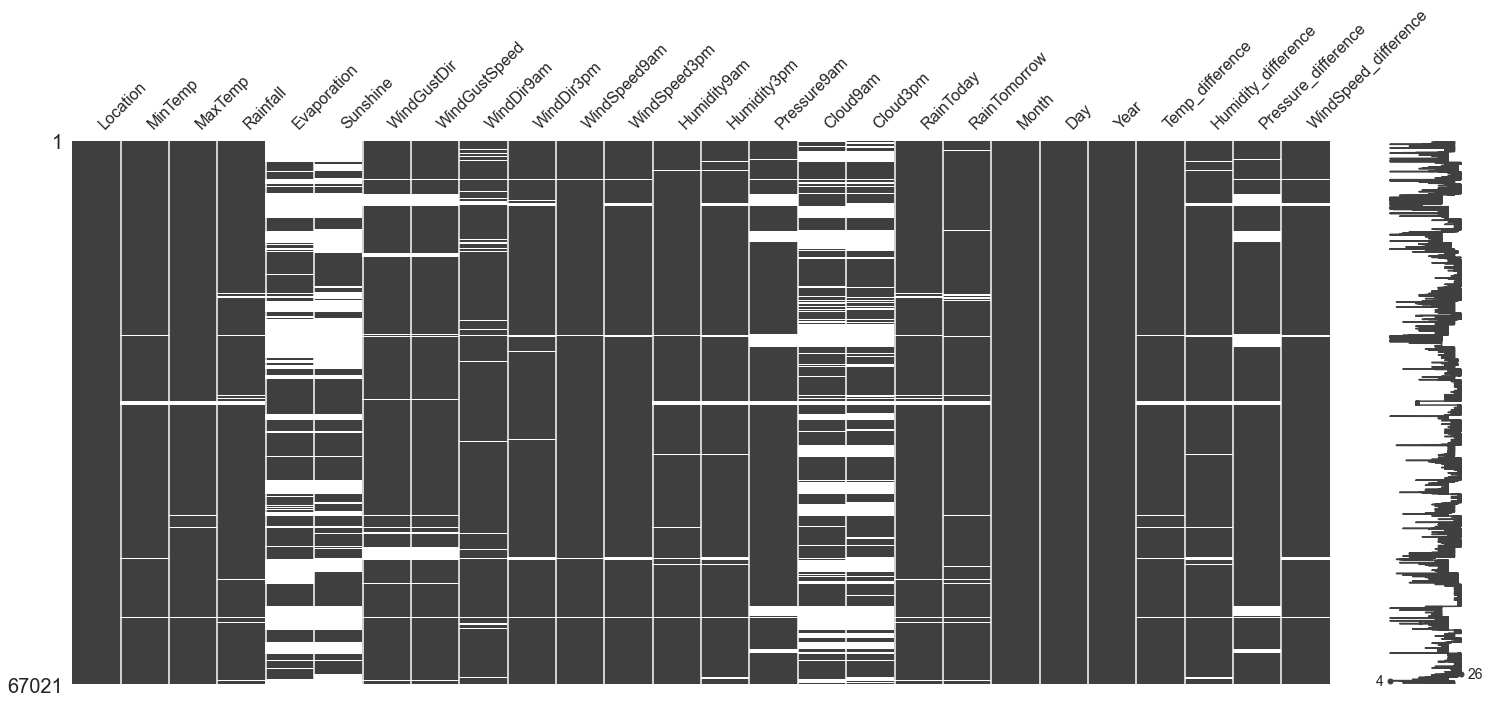

In [112]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

def create_missing_data_frame(data):
    """
    Function to create a table with missing data

    Args:
    -----
    data : The data frame to be used

    Returns:
    --------
    frame : The table with missing data
    """
    # Create a table with data missing 
    missing_values=data.isnull().sum() # missing values

    percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing , 
        'data type' : data.dtypes
    }
    frame=pd.DataFrame(value)
    return frame

missing_data=create_missing_data_frame(rain_data)
missing_data

### DELETE SOME MISSING VALUES

Shape of the data: (53362, 26)


,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,902,1.690341,float64
MaxTemp,876,1.641618,float64
Rainfall,1975,3.701136,float64
Evaporation,15771,29.554739,float64
Sunshine,18531,34.726959,float64
WindGustDir,4094,7.672126,object
WindGustSpeed,4062,7.612158,float64
WindDir9am,3232,6.056744,object
WindDir3pm,1482,2.777257,object


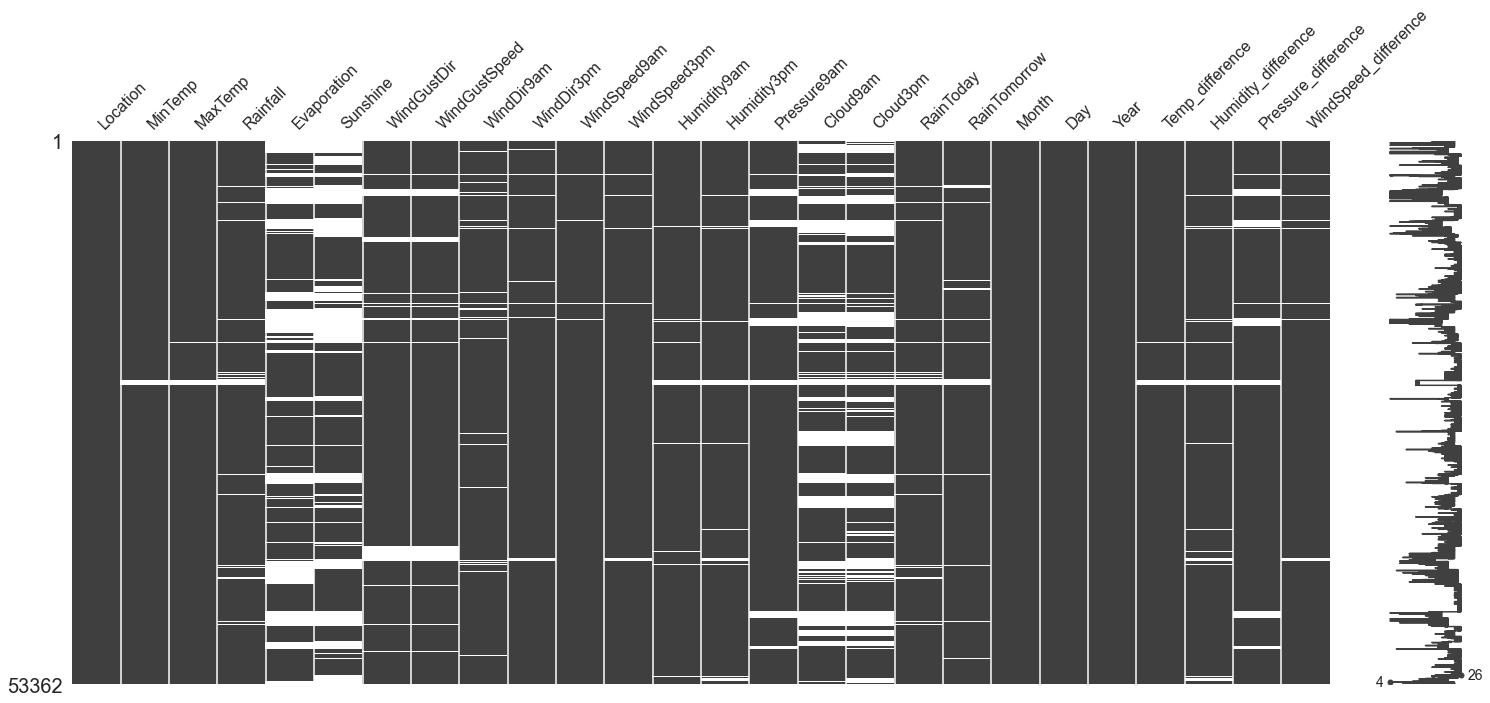

In [113]:
# Find the rows with missing values in the variables Evaporation and Sunshine

mask = rain_data['Evaporation'].isna() & rain_data['Sunshine'].isna()

# Select the indexes of the rows with missing values
indices_with_na = rain_data[mask].index

# Calculate the number of rows to remove
num_to_remove = int(0.5 * len(indices_with_na))

# Select randomly the indexes of the rows to remove
indices_to_remove = np.random.choice(indices_with_na, num_to_remove, replace=False)

# Delete the rows with missing values
rain_data.drop(indices_to_remove, inplace=True)

msno.matrix(rain_data)
missing_data = create_missing_data_frame(rain_data)
print(f'Shape of the data: {rain_data.shape}')
missing_data

# Impute the rest of values

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(train_data, test_data):
    """
    Impute missing values in both training and test datasets.

    Args:
    --------
    train_data: DataFrame containing the training data.
    test_data: DataFrame containing the test data.
    
    Returns:
    --------
    train_imputed: Training data with imputed values.
    test_imputed: Test data with imputed values, using the same imputer as training.
    """
    # Separate the features into numerical and categorical
    categorical_cols = train_data.select_dtypes(include=['object']).columns
    numerical_cols = train_data.select_dtypes(exclude=['object']).columns
    

    # Create copies of the original dataframes to avoid changing the original data
    train_imputed = train_data.copy()
    test_imputed = test_data.copy()
    
    # Imputation for numerical variables using MICE with KNN
    mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='median', max_iter=3, tol=0.01, random_state=42)
    train_imputed[numerical_cols] = mice_imputer.fit_transform(train_imputed[numerical_cols])
    test_imputed[numerical_cols] = mice_imputer.transform(test_imputed[numerical_cols])
    
    # Round Cloud9am and Cloud3pm after imputation for better interpretation
    cloud_cols = ['Cloud9am', 'Cloud3pm']
    for col in cloud_cols:
        train_imputed[col] = train_imputed[col].apply(lambda x: min(8, max(0, round(x))))
        test_imputed[col] = test_imputed[col].apply(lambda x: min(8, max(0, round(x))))
    
    # Imputation for categorical variables using Random Forest
    for column in categorical_cols:
        rf_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
        if not train_imputed[train_imputed[column].notna()].empty:
            rf_imputer.fit(train_imputed[train_imputed[column].notna()].drop(columns=categorical_cols), train_imputed[train_imputed[column].notna()][column])
            
            # Impute training data if there are NaNs
            if train_imputed[column].isna().any():
                train_imputed.loc[train_imputed[column].isna(), column] = rf_imputer.predict(train_imputed[train_imputed[column].isna()].drop(columns=categorical_cols))
            
            # Impute test data if there are NaNs
            if test_imputed[column].isna().any():
                test_imputed.loc[test_imputed[column].isna(), column] = rf_imputer.predict(test_imputed[test_imputed[column].isna()].drop(columns=categorical_cols))

    
    return train_imputed, test_imputed

## EVALUATE THE QUALITY OF THE IMPUTATION BY CREATING FAKE MISSINGS

In [115]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

def hide_data(df, columns_to_exclude, hide_ratio=0.1):
    """
    Randomly hides data in the DataFrame based on the specified ratio,
    except for the specified columns.

    Args:
    -----
    df (DataFrame): The DataFrame to hide data from.
    columns_to_exclude (list): The columns to exclude from hiding.
    hide_ratio (float): The ratio of data to hide.

    Returns:
    --------
    df_copy (DataFrame): A copy of the DataFrame with hidden data.
    original_data (DataFrame): The original data that was hidden.
    """

    df_copy = df.copy()
    mask = np.random.rand(*df.shape) < hide_ratio
    mask_df = pd.DataFrame(mask, columns=df.columns, index=df.index)
    mask_df[columns_to_exclude] = False
    df_copy[mask_df] = np.nan
    original_data = df.where(mask_df)
    return df_copy, original_data

def evaluate_imputation(train_data, test_data, hide_ratio=0.1):
    """
    Imputes hidden data in the test dataset using models trained on the train dataset
    and evaluates the imputation quality.

    Parameters:
    -----------
    train_data (DataFrame): The training dataset.
    test_data (DataFrame): The test dataset.
    hide_ratio (float): The ratio of data to hide.

    Returns:
    --------
    metrics_num (dict): A dictionary containing the evaluation metrics for numerical columns.
    metrics_cat (dict): A dictionary containing the evaluation metrics for categorical columns.
    """
    excluded_columns = ['Sunshine', 'Evaporation', 'Date', 'Location', 'Month', 'Day', 'Year']
    test_data_hidden, original_test_data = hide_data(test_data, excluded_columns, hide_ratio)
    
    # Ensure impute_dataset function is adjusted to train on train_data and transform test_data
    # This function should now properly separate the returned imputed train and test data
    _, test_data_imputed = impute_dataset(train_data, test_data_hidden)  # Assuming impute_dataset returns a tuple (train_imputed, test_imputed)
    
    metrics_num = {}
    metrics_cat = {}

    for column in test_data.columns:
        if column in excluded_columns:
            continue
        if test_data[column].dtype in ['float64', 'int64']:
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                mse = mean_squared_error(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                r2 = r2_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                metrics_num[column] = {'MSE': mse, 'R2': r2}
        elif test_data[column].dtype == 'object':
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                accuracy = accuracy_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                f1 = f1_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index], average='weighted')
                metrics_cat[column] = {'Accuracy': accuracy, 'F1 Score': f1}
    
    return metrics_num, metrics_cat


# Use case example
train_data_example, test_data_example = train_test_split(rain_data, test_size=0.2, random_state=42)
metrics_num, metrics_cat = evaluate_imputation(train_data_example, test_data_example, hide_ratio=0.1)

# Convert the results to DataFrames for better visualization
df_metrics_num = pd.DataFrame(metrics_num).T
df_metrics_cat = pd.DataFrame(metrics_cat).T

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'Month', 'Day', 'Year', 'Temp_difference',
       'Humidity_difference', 'Pressure_difference', 'WindSpeed_difference'],
      dtype='object')
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


c:\Users\llucfurriols\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


### PRINT THE IMPUTATION RESULTS

In [116]:
# Print the results
print("Numerical Variables Imputation Metrics:")
df_metrics_num

Numerical Variables Imputation Metrics:


,MSE,R2
MinTemp,11.387424,0.723613
MaxTemp,10.810926,0.779754
Rainfall,67.733141,0.182436
WindGustSpeed,91.497962,0.581641
WindSpeed9am,18.707436,0.765054
WindSpeed3pm,21.663647,0.747444
Humidity9am,46.081107,0.860321
Humidity3pm,45.944932,0.898481
Pressure9am,39.519219,0.239797
Cloud9am,4.522727,0.416564


In [117]:
print("Categorical Variables Imputation Metrics:")
df_metrics_cat

Categorical Variables Imputation Metrics:


,Accuracy,F1 Score
WindGustDir,0.217832,0.210912
WindDir9am,0.197433,0.187500
WindDir3pm,0.220307,0.215166


# CREATING THE TRAINING AND TESTING DATASETS

In [118]:
from sklearn.model_selection import train_test_split

# Convert ['Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'] into categorical variables
rain_data['RainToday'].replace({0: 'No', 1: 'Yes'}, inplace=True)
rain_data['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace=True)


# Division of the dataset into training and test sets (including the target variable)
train_data, test_data = train_test_split(rain_data, test_size=0.3, random_state=42)


# Impute the dataset
train_data_imputed, test_data_imputed = impute_dataset(train_data, test_data)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Month', 'Day',
       'Year', 'Temp_difference', 'Humidity_difference', 'Pressure_difference',
       'WindSpeed_difference'],
      dtype='object')
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


c:\Users\llucfurriols\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [119]:
print(train_data_imputed['RainToday'].dtype)


object


# Outliers

We will only detect and eliminate outliers in the train dataset

In [120]:
numeric_columns = train_data_imputed.select_dtypes(include=['float64', 'int64']).columns

## Isolation forest

#### Estimating the percentage of outliers:

In [121]:

lower_bound = train_data_imputed.quantile(0.01)
upper_bound = train_data_imputed.quantile(0.99)

num_outliers = ((train_data_imputed < lower_bound) | (train_data_imputed > upper_bound)).sum().sum()

contamination = num_outliers / train_data_imputed.size

print(f'Estimated proportion of outliers: {contamination}')


Estimated proportion of outliers: 0.00928974915000134


C:\Users\llucfurriols\AppData\Local\Temp\ipykernel_4740\2465441040.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  num_outliers = ((train_data_imputed < lower_bound) | (train_data_imputed > upper_bound)).sum().sum()


In [122]:

from sklearn.ensemble import IsolationForest

outliers_data = pd.get_dummies(train_data_imputed)


iso = IsolationForest(contamination=contamination, random_state=42)

iso.fit(outliers_data)

outliers_iso = iso.predict(outliers_data)

#outliers are marked as -1 and inliers are marked as 1
train_data_imputed['outlier_iso'] = outliers_iso



c:\Users\llucfurriols\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


## Interquartile range

In [123]:
def find_outliers_iqr(data, numerical_columns, categorical_columns=None):
    """
    Find outliers using the interquartile range (IQR) method for numerical variables.
    
    Args:
    - data: DataFrame containing the dataset.
    - numerical_columns: List of numerical variable names.
    - categorical_columns: List of categorical variable names (optional).
    
    Returns:
    - data: DataFrame containing the dataset with an additional 'outlier_iqr' column.
    """
    # Initialize 'outlier_iqr' column with zeros
    data['outlier_iqr'] = 0
    
    # Calculate IQR and identify outliers for each numerical variable
    for col in numerical_columns:
        # Calculate quartiles
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Find outliers
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        
        # Increment 'outlier_iqr' for outliers
        data.loc[outlier_mask, 'outlier_iqr'] += 1
    
    return data

In [124]:
# Find outliers using the IQR method
train_data_imputed = find_outliers_iqr(train_data_imputed, numeric_columns)

In [125]:

print(f'Number of outliers detected using the IQR method: {len(train_data_imputed[train_data_imputed["outlier_iqr"] > 0])}')
print(f'Number of outliers detected using the Isolation Forest method: {len(train_data_imputed[train_data_imputed["outlier_iso"] == -1])}')


Number of outliers detected using the IQR method: 4447
Number of outliers detected using the Isolation Forest method: 347


#### Eliminate the rows that has been detected as outlier by both methods: 

In [126]:
# Create a mask where both conditions are True
mask = (train_data_imputed["outlier_iqr"] > 0) & (train_data_imputed["outlier_iso"] == -1)

original_train_data = train_data_imputed.copy()
# Invert the mask using '~' to keep rows that are not outliers
train_data_imputed = train_data_imputed[~mask]

In [127]:
# How many rows have been removed?
print(f'Number of rows removed: {len(original_train_data) - len(train_data_imputed)}')

Number of rows removed: 131


#### Eliminate the rows that have 3 or more columns detected as outlier by iqr:

In [128]:
# Eliminate the rows that have 3 or more columns detected as outlier by iqr:
mask = (train_data_imputed["outlier_iqr"] >= 3)
train_data_imputed = train_data_imputed[~mask]

# How many rows have been removed?
print(f'Number of rows removed: {len(original_train_data) - len(train_data_imputed)}')

Number of rows removed: 136


### Visualize the removed outliers: 

We removed outliers by considering the entire set of variables together, rather than individually. To visualize the relationships among variables, we used Principal Component Analysis (PCA) to condense the data into two dimensions. This allowed us to plot the variables in a 2D space, and visualize the removed outliers. 

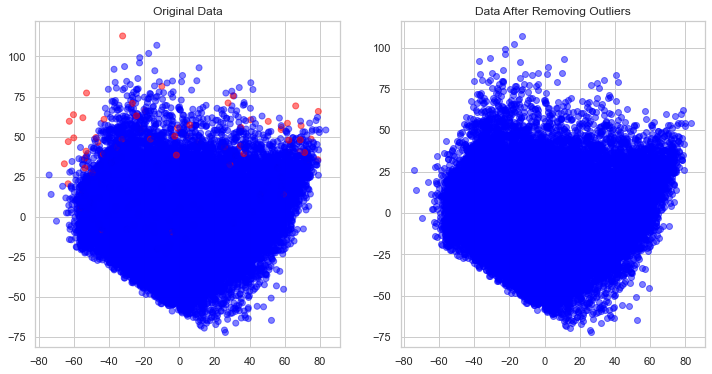

In [129]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a mask for outliers in the original data
outlier_mask = np.isin(pd.get_dummies(original_train_data).index, pd.get_dummies(train_data_imputed).index, invert=True)

# Apply PCA to the original data
pca = PCA(n_components=2)
original_data_pca = pca.fit_transform(pd.get_dummies(original_train_data))

# Apply PCA to the filtered data
filtered_data_pca = pca.transform(pd.get_dummies(train_data_imputed))


# Create a color array (red for outliers, blue for inliers)
colors = np.where(outlier_mask, 'red', 'blue')

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data in the first subplot
ax[0].scatter(original_data_pca[:, 0], original_data_pca[:, 1], color=colors, alpha=0.5)
ax[0].set_title('Original Data')

# Plot the filtered data in the second subplot
ax[1].scatter(filtered_data_pca[:, 0], filtered_data_pca[:, 1], color='blue', alpha=0.5)
ax[1].set_title('Data After Removing Outliers')

plt.show()

In [130]:
# Drop the 'outlier' and 'outlier_iqr' columns
train_data_imputed.drop(columns=['outlier_iso', 'outlier_iqr'], inplace=True)

# Before training the model:

In [131]:

# Separate the target variable from the features
y_train = train_data_imputed['RainTomorrow']
y_test = test_data_imputed['RainTomorrow']
X_train = train_data_imputed.drop('RainTomorrow', axis=1)
X_test = test_data_imputed.drop('RainTomorrow', axis=1)



# Change the target variable to binary
y_train = y_train.map({'No': 0, 'Yes': 1}).values
y_test = y_test.map({'No': 0, 'Yes': 1}).values

X_train['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
X_test['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)


## Ensuring there are no missing values

Shape of the data: (37217, 25)


,missing_values,percent_missing %,data type
Location,0,0.0,object
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustDir,0,0.0,object
WindGustSpeed,0,0.0,float64
WindDir9am,0,0.0,object
WindDir3pm,0,0.0,object


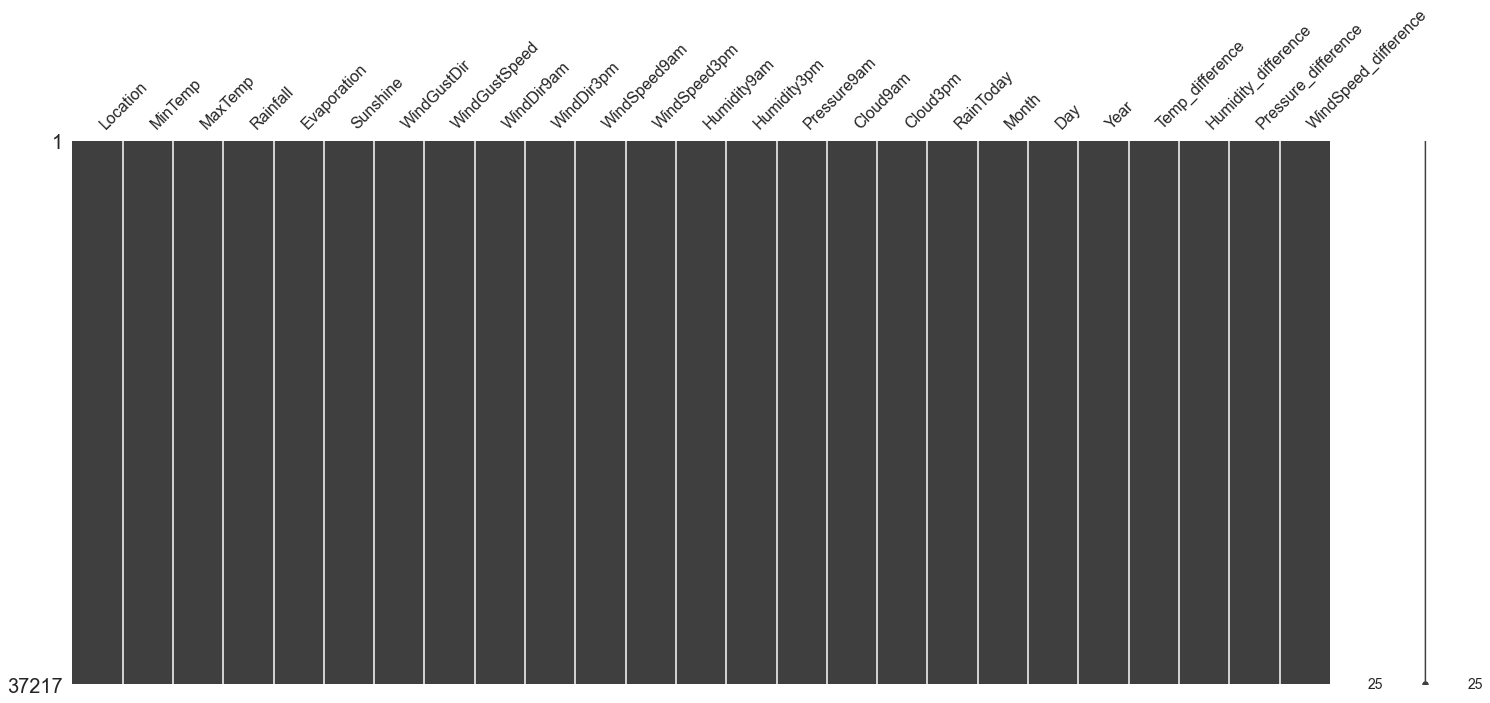

In [132]:
missing_data = create_missing_data_frame(X_train)
msno.matrix(X_train)
print(f'Shape of the data: {X_train.shape}')
missing_data

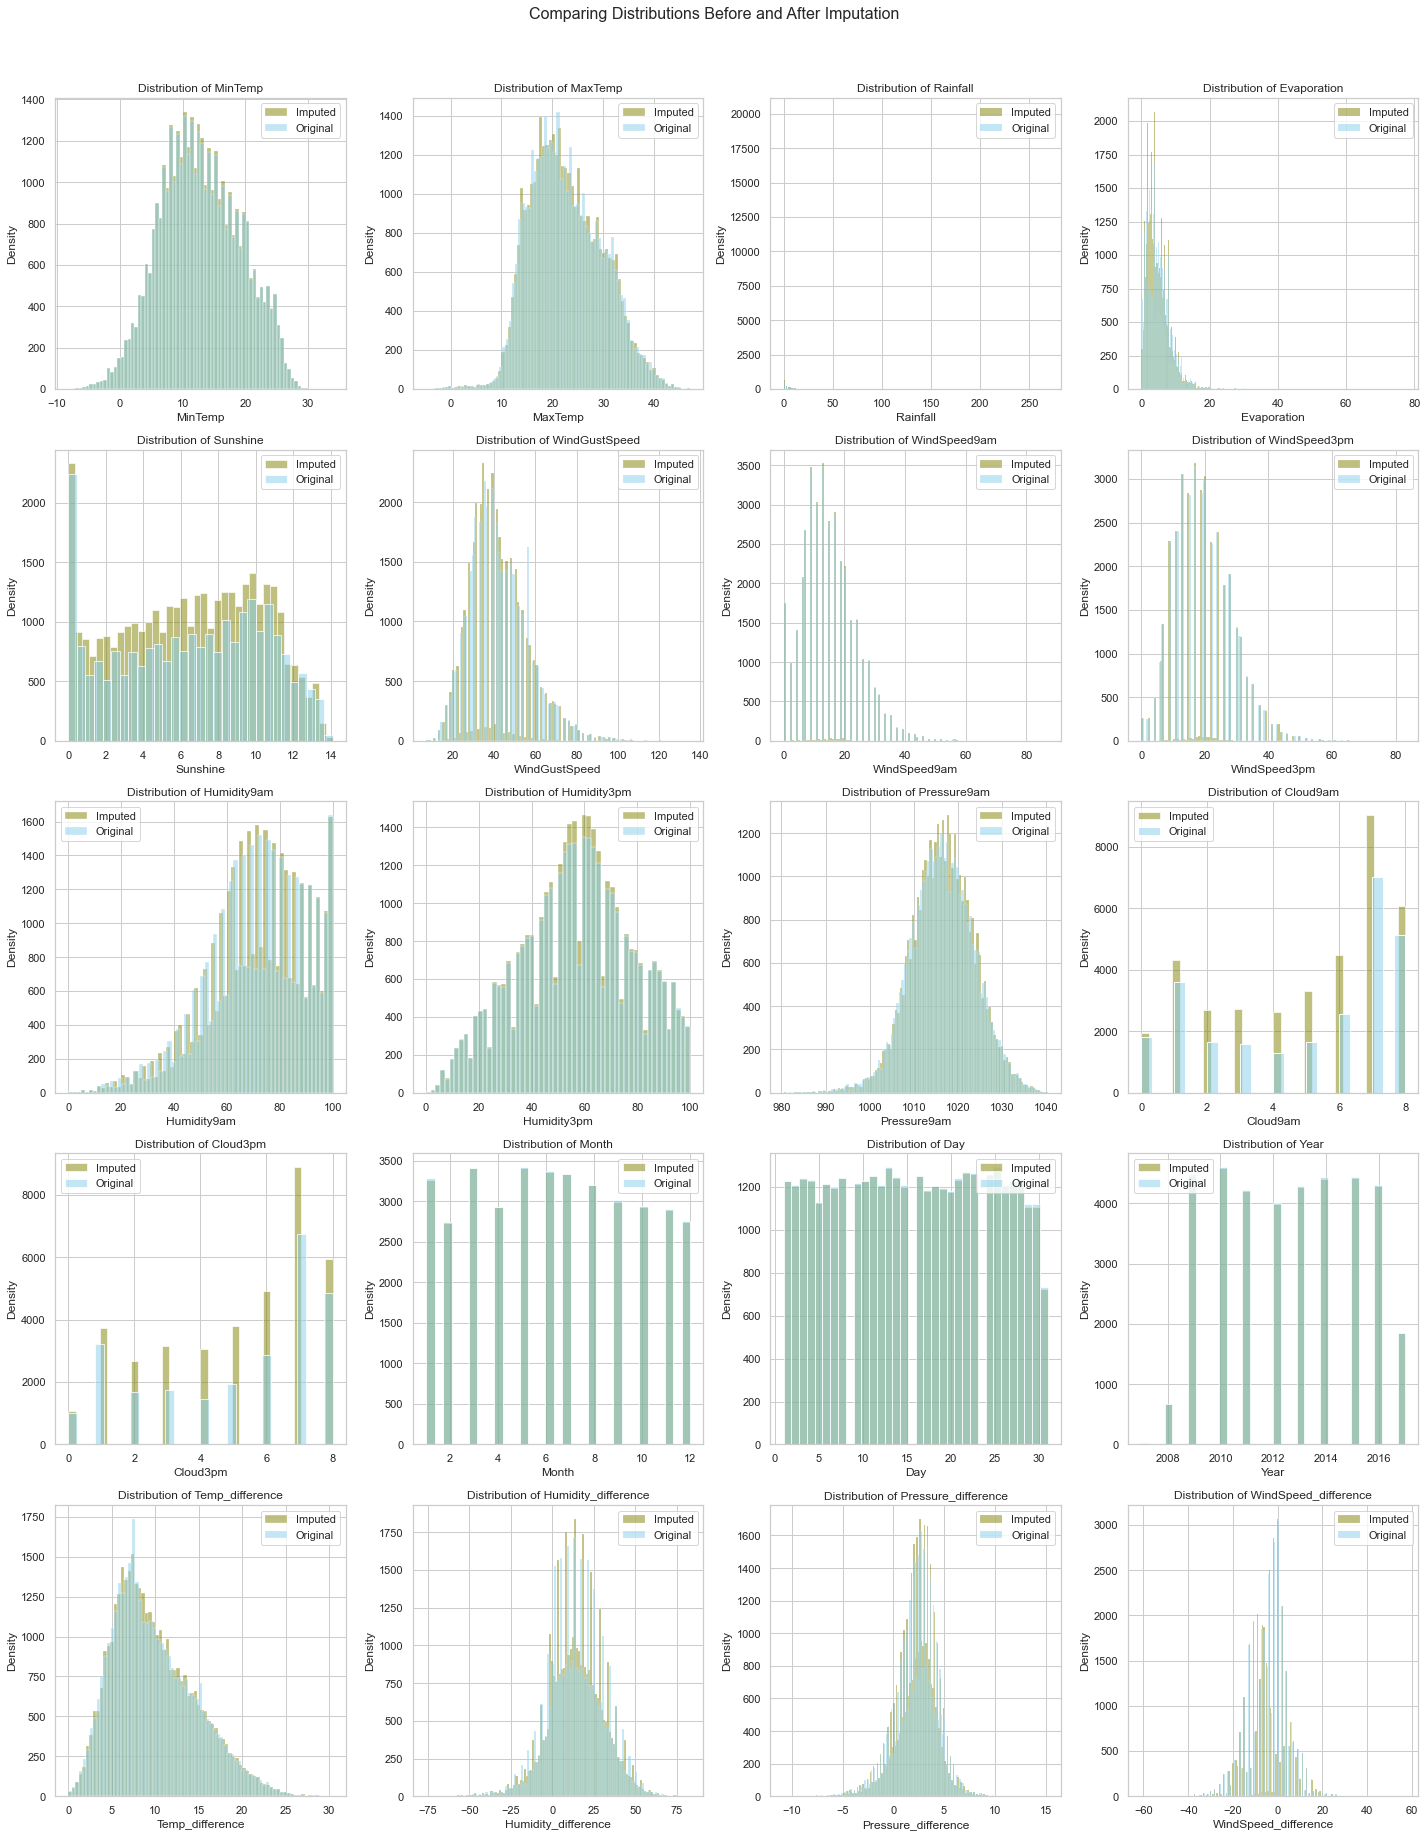

In [133]:
# Configuration of seaborn aesthetics for the plots
sns.set(style="whitegrid")


def compare_distributions(original_df, imputed_df):
    """
    Function to compare the distributions of the original and imputed data.

    Args:
    -------
    original_df: DataFrame containing the original data.
    imputed_df: DataFrame containing the imputed data.

    Returns:
    -------
    None
    """
    numerical_cols = original_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numerical_cols)
    n_rows = max(n_cols // 4, 1)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 5 * n_rows))  # Adjust the size of the plot
    fig.suptitle('Comparing Distributions Before and After Imputation', fontsize=16, y=1.02)

    axes = axes.flatten()  # Flatten the 2D array of subplots

    # Iterate over the numerical columns and plot the distributions
    for ax, column in zip(axes, numerical_cols):
        sns.histplot(imputed_df[column], kde=False, color="olive", alpha=0.5, label='Imputed', ax=ax)
        sns.histplot(original_df[column], kde=False, color="skyblue", alpha=0.5, label='Original', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()
    
    # Hide the empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Compare the distributions of the original and imputed data
compare_distributions(train_data.drop('RainTomorrow', axis=1), X_train)

# TRAINING LOGISTIC REGRESSION MODELS

In [134]:
# Print the unique values in 'y_train'
print(np.unique(y_train))

[0 1]


In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix


# Selection of the categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creation of the preprocessor with the StandardScaler for numerical variables and OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Logistic Regression model

# Define the hyperparameters to tune
param_grid_lr = {
    'classifier__solver': ['liblinear'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__max_iter': [350, 500, 1000],
    'classifier__penalty': ['l1', 'l2'],
}

# Create the Logistic Regression model
LR_model = LogisticRegression(random_state=42)

# Define the pipeline in order to include the preprocessor and the classifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LR_model)])

# Setup GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid_lr, 
    cv=5,  # Number of cross-validation folds
    scoring='accuracy', 
    verbose=1  # For detailed logging information
)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best model's parameters
best_params_lr = grid_search_lr.best_params_
print("Best parameters:", best_params_lr)

# Best model
best_model = grid_search_lr.best_estimator_

# Predictions with the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression:\n Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.2f}", f", F1 Score: {f1:.2f}\n")

Fitting 5 folds for each of 42 candidates, totalling 210 fits


Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 350, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


ValueError: pos_label=Yes is not a valid label. It should be one of [0, 1]

c:\Users\llucfurriols\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


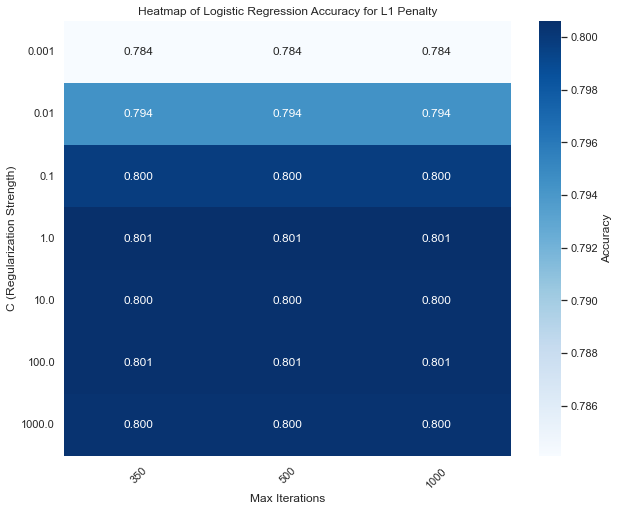

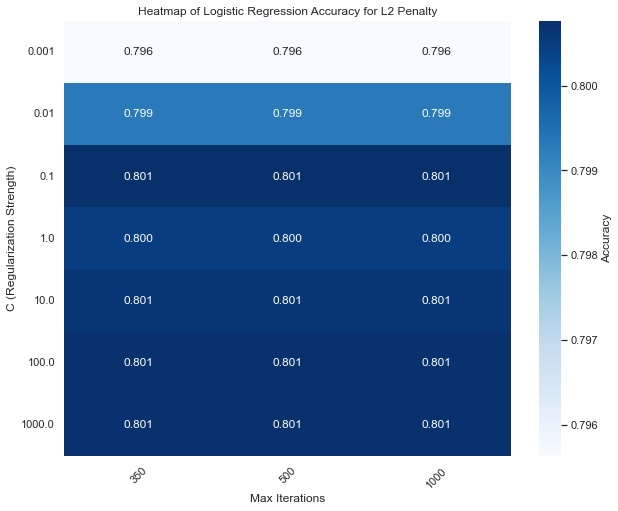

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Extract the results into a DataFrame
results = pd.DataFrame(grid_search_lr.cv_results_)

# Filter the results for each penalty type
results_l1 = results[results['param_classifier__penalty'] == 'l1']
results_l2 = results[results['param_classifier__penalty'] == 'l2']


def plot_accuracy_heatmap_combinations(results, title, file_name):
    """
    Function to plot a heatmap of the accuracy based on different combinations of hyperparameters.

    Args:
    -------
    results: DataFrame containing the results of the GridSearchCV
    title: Title of the plot
    file_name: Name of the file to save the plot

    Returns:
    -------
    None
    
    """
    # Pivot the DataFrame to create a matrix where rows are C values, columns are max_iter, and cells are accuracies
    results_pivot = results.pivot(index="param_classifier__C", columns="param_classifier__max_iter", values="mean_test_score")
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(results_pivot, annot=True, fmt=".3f", cmap='Blues', cbar_kws={'label': 'Accuracy'})
    plt.title(title)
    plt.xlabel('Max Iterations')
    plt.ylabel('C (Regularization Strength)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Save the plot as an image
    plt.savefig(f'../images/{file_name}.png')
    plt.show()

# Plot heatmap for L1 Penalty
plot_accuracy_heatmap_combinations(results_l1, title='Heatmap of Logistic Regression Accuracy for L1 Penalty', file_name='heatmap_l1')

# Plot heatmap for L2 Penalty
plot_accuracy_heatmap_combinations(results_l2, 'Heatmap of Logistic Regression Accuracy for L2 Penalty', file_name='heatmap_l2')



# TRAINING NN MODELS

Creating a function to train a Neural Network model with different hyperparameters.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

def train_and_evaluate_nn(create_model_function, X_train, y_train, X_test, y_test, epochs=100, batch_size=32, validation_split=0.2, use_early_stopping=False, number_iterations=10, title='Neural Network Training Results'):
    """
    Trains a neural network model, evaluates it on the test set, and visualizes the training process and results.

    Args:
    -------
    create_model_function: Function that creates a neural network model
    X_train: Training features
    y_train: Training target
    X_test: Test features
    y_test: Test target
    epochs: Number of epochs for training
    batch_size: Batch size for training
    validation_split: Fraction of training data to use as validation
    use_early_stopping: Whether to use early stopping
    number_iterations: Number of iterations to train the model
    title: Title of the plots

    Returns:
    --------
    best_model: The best model based on the highest accuracy
    best_model_history: The history of the best model
    """

    models = []
    histories = []
    accuracies = []
    f1_scores = []
    conf_matrices = []

    for _ in range(number_iterations):
        print(f"Iteration: {_ + 1}")
        
        # Create a new model for each iteration
        new_model = create_model_function()

        callbacks = []
        if use_early_stopping:
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            callbacks.append(early_stopping)
        
        history = new_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=validation_split, callbacks=callbacks, verbose=1)
        
        # Evaluating the model on the test set
        y_pred_prob = new_model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_f1_score = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Append the results to the lists
        models.append(new_model)
        histories.append(history)
        accuracies.append(test_accuracy)
        f1_scores.append(test_f1_score)
        conf_matrices.append(conf_matrix)

    # Calculate the mean and standard deviation of the results
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    mean_f1_score = np.mean(f1_scores)
    std_f1_score = np.std(f1_scores)

    conf_matrix = np.mean(conf_matrices, axis=0).astype(int)

    print(f"Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean F1 Score: {mean_f1_score:.4f} +/- {std_f1_score:.4f}")

    # Find the model with the highest accuracy

    max_accuracy_index = np.argmax(accuracies)
    best_model = models[max_accuracy_index]
    best_model_history = histories[max_accuracy_index]
    best_model_conf_matrix = conf_matrices[max_accuracy_index]

    # Plotting accuracy and loss for the best model
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1)
    plt.plot(best_model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(best_model_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(best_model_history.history['loss'], label='Train Loss')
    plt.plot(best_model_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Save the plot as an image
    plt.savefig(f'../images/epochs_{title}.png')
    plt.show()
    

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(best_model_conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Rain', 'Rain'], yticklabels=['Not Rain', 'Rain'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Save the plot as an image
    plt.savefig(f'../images/confusion_matrix_{title}.png')
    plt.show()

    return best_model, best_model_history



# Transforming the data using the preprocessor and converting it to a numpy array
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()


ImportError: DLL load failed while importing _pywrap_tf2: Error en una rutina de inicialización de biblioteca de vínculos dinámicos (DLL).

## NN with only one layer and SIGMOID activation function
Creating a Neural Network with only one layer and the sigmoid activation function which is the same as the logistic regression model (without hyperparameters).

In [ ]:
# Build and compile the neural network model wih only one layer and sigmoid activation function

def create_single_layer_model():
    model = Sequential([Dense(1, activation='sigmoid')])
    model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and visualize the model
model, history = train_and_evaluate_nn(create_single_layer_model, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=128, use_early_stopping=True, number_iterations=3, title='one_layer_sigmoid')

As we can see the accuracy is very similar to the one of the logistic regression model.

## More complex NN structure

Creating a more complex Neural Network with more layers and more neurons in order to see if the model can learn more complex patterns. We will also uso regularization and dropout to avoid overfitting.

In [ ]:
# Configuration of the neural network model

from tensorflow.keras.regularizers import l2


def create_advanced_model_with_regularization():
    model = Sequential([
        Dense(128, input_dim=X_train_transformed.shape[1], kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(64, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and visualize the model
model, history = train_and_evaluate_nn(create_advanced_model_with_regularization, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=150, use_early_stopping=True, title='advanced_model')